# ${\color{pink}\mathbb{Matala - 2}}$

In [242]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

#### ${\color{pink}\mathbb{Loading-Data}}$

In [243]:
science = pd.read_csv(r"C:\Users\matan\Documents\Visual Code thong\Ai gibli\Pollution_data.csv")
science.head()

,Temperature,Humidity,WindSpeed,Pollution
0,24.363503,61.889703,2.776994,-34.294902
1,38.767858,52.165782,8.128514,-49.717378
2,33.299849,38.571657,13.094188,-35.615621
3,29.966462,68.827701,10.983373,-47.278829
4,18.900466,61.083870,12.098417,173.448781


In [244]:
size,_=science.shape
print(science.shape)
science.info()

(500, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Humidity     500 non-null    float64
 2   WindSpeed    500 non-null    float64
 3   Pollution    500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


##### ${\color{pink}\mathbb{Nirmul}}$

In [245]:
def nirmul(thing): #min max scalling
    return (thing - thing.min()) / (thing.max() - thing.min())

In [246]:
polly = nirmul(science['Pollution'].to_numpy())
tempra = nirmul(science['Temperature'].to_numpy())
windy = nirmul(science['WindSpeed'].to_numpy())
humy = nirmul(science['Humidity'].to_numpy())

print(type(polly),polly.shape)
polly[:20]

<class 'numpy.ndarray'> (500,)


array([0.21713939, 0.19688534, 0.21540492, 0.20008784, 0.48996531,
       0.31530868, 0.85196946, 0.13579562, 0.31621574, 0.16599325,
       0.49059711, 0.2465022 , 0.17765671, 0.55039756, 0.26231613,
       0.29512495, 0.15528797, 0.27545153, 0.49720342, 0.18794184])

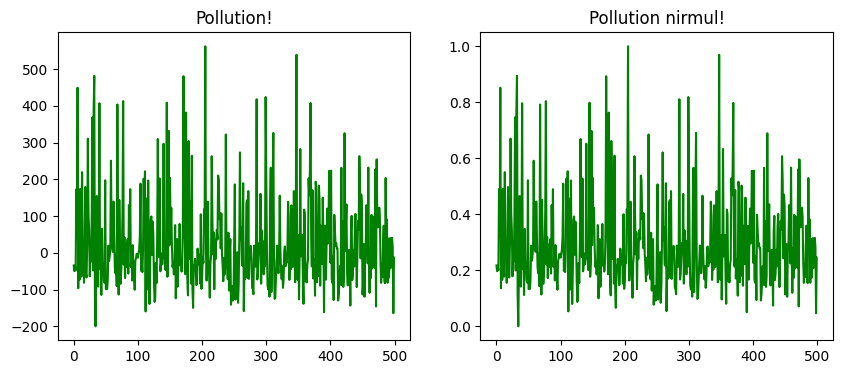

In [247]:
#just to see....
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(science['Pollution'].to_numpy(), label="Pollution", color="green")
axs[0].set_title("Pollution!")

axs[1].plot(polly, label="Pollution", color="green")
axs[1].set_title("Pollution nirmul!")

plt.show()


## ${\color{pink}\mathbb{Creating-Func}}$

In [248]:
weghit =[1,1,1,1,1]

In [249]:
def func_goal(temp,hum,wind,weghit=[1,1,1,1,1]):

    return weghit[0]*temp + weghit[1]*hum + weghit[2]*wind + weghit[3]*temp**2 + weghit[4]*temp*wind

#### ${\color{pink}\mathbb{Quick-Check-Error}}$

In [250]:
pollution_prediction = np.zeros(size)
for i in range(size):

    pollution_prediction[i] = func_goal(tempra[i],humy[i],windy[i])
    

In [251]:
print(pollution_prediction.shape)
pollution_prediction[:20]       #first 10....

(500,)


array([1.45979704, 3.46441201, 3.09877246, 2.94581903, 1.7888615 ,
       1.0928151 , 1.69557421, 4.04233197, 2.31178712, 2.77653198,
       0.84863799, 4.29950297, 4.20685171, 1.16147893, 1.08231847,
       1.32744485, 0.9983234 , 2.47665077, 2.91757935, 0.55770225])

In [252]:
errorrr = np.sum((polly - pollution_prediction)**2) /2
errorrr


1060.7115563281072

#### ${\color{pink}\mathbb{Gradient-LS-Part}}$

-----

$$
\min_{w} \sum^{N}_{i=1} |y_i - (w_1 \cdot temp + w_2 \cdot hum + w_3 \cdot wind + w_4 \cdot temp^2 + w_5 \cdot temp \cdot hum)| = \min_{w} |Y - (wX ) | =  \min_{w} ||Y - Aw ||_2 \\


$$

$$

w = \begin{bmatrix}
w_1  \\
w_2  \\
w_3  \\
w_4  \\
w_5 \end{bmatrix}



Y = \begin{bmatrix}
y_1 \\
y_2 \\
. \\
y_N \end{bmatrix}

A = \begin{bmatrix}
temp & hum & wind & temp^2 & temp \cdot hum    \\
. & . &. & . & . \\
temp_n & hum_n & wind_n & temp_n^2 & temp_n \cdot hum_n \end{bmatrix}



$$

The LST problem:
$$
\frac{1}{2} \cdot \min_{w} ||Aw-Y||^{2} _{2}
$$


In [253]:
t_k = 0.001   #step size const
x_k = 0.3   #first step

In [254]:
A = np.column_stack([
    tempra, humy, windy, tempra**2, tempra*windy
    ])
weghit =[1,1,1,1,1]


In [255]:
from sklearn.preprocessing import StandardScaler    #cuz gradients is diveraging

scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)


polly_scaled = polly  # Start with original
if np.std(polly) > 1e3:  # crude threshold for large values
    print("Warning: Scaling polly to avoid overflow.")
    polly_scaled = (polly - np.mean(polly)) / np.std(polly)


In [256]:
def f(w):
    loss = A_scaled @ w - polly_scaled
    return 0.5 * np.linalg.norm(np.nan_to_num(loss)) ** 2

def gradient(w):
    w = np.asarray(w)  # Ensures w is a NumPy array
    grad = A_scaled.T @ (A_scaled @ w - polly_scaled)
    return np.nan_to_num(grad)




In [257]:
def armijo_search_step(w_k,a=0.7,b=0.8,s=1):
    t = s
    grad_fk = gradient(w_k)
    grad_norm = np.linalg.norm(grad_fk)

    if grad_norm < 1e-12:
        return 0  # Avoid division by zero
    d_k = -grad_fk / np.linalg.norm(grad_fk)
    
    iter=0
    while ( f(w_k+t*d_k) > f(w_k) + a*t* np.dot(grad_fk, d_k)  ):
        t=b*t
        iter+=1
        if t < 1e-12:  # safety stop
            break  
    
    return t


x_k = np.array([1,1,1,1,1])

t_k_2 = armijo_search_step(x_k,0.7,0.8,1)     #step armijo way
print("best step size:",t_k_2)

best step size: 1


In [258]:
def grady(w_start,t_k,epsilo=1e-5,iterations = 1000):

    losses = [f(w_start)] 

    w = w_start
    for i in range(iterations):
        grad_fk = gradient(w)
        grad_norm = np.linalg.norm(grad_fk)

        if grad_norm < epsilo:
            break
        w = w - t_k * grad_fk
        losses.append(f(w))

    return w,losses

w_star = np.array([1, 1, 1, 1, 1])
t_k = 0.001   #step size const

w_opt,lossy = grady(w_star,t_k)

print("step size = 0.1 (const)")
print("Optimized weights:", w_opt)
print("Final loss:", f(w_opt))



step size = 0.1 (const)
Optimized weights: [-0.19456206  0.0218378   0.02812554  0.13771851 -0.00463053]
Final loss: 26.715735572433


In [259]:
def grady_with_steps(w_start,t_k,epsilo=1e-5,iterations = 1000):
    
    losses = [f(w_start)] 

    w = w_start
    for i in range(iterations):
        grad_fk = gradient(w)
        grad_norm = np.linalg.norm(grad_fk)

        if grad_norm < epsilo:
            break

        t_k = armijo_search_step(w)
        d_k = -grad_fk / (np.linalg.norm(grad_fk) + 1e-12)  # so that it won;t give me problems. (devision by zero or some other misstkae)
        w = w + t_k * d_k
        losses.append(f(w))


    return w,lossy


w_start = np.zeros(A.shape[1])
t_k_start = 0.001
w_opt_2,lossy_2 = grady_with_steps(w_start,t_k_start)

print("\nstep size -> armijo algo",t_k_2)
print("Optimized weights:", w_opt_2)
print("Final loss:", f(w_opt_2))


step size -> armijo algo 1
Optimized weights: [-0.19456213  0.0218378   0.02812553  0.13771858 -0.00463052]
Final loss: 26.715735572432042


In [260]:
print("loss const step:",f(w_opt))
print("loss armijo step way:",f(w_opt_2))

loss const step: 26.715735572433
loss armijo step way: 26.715735572432042


#### ${\color{pink}\mathbb{Visual}}$

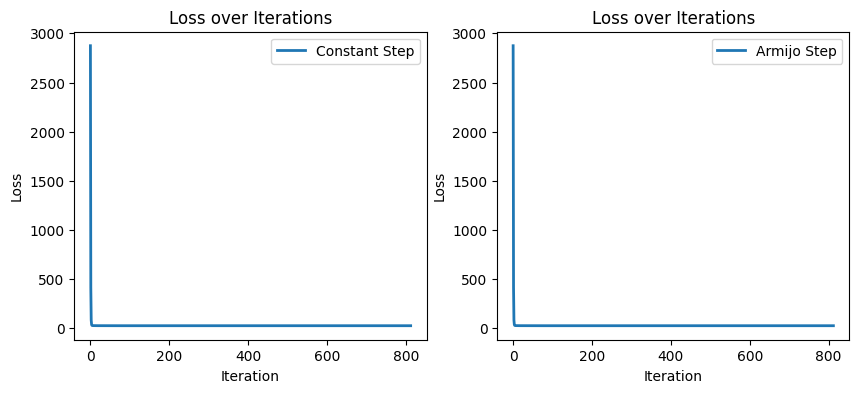

In [261]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(lossy, label="Constant Step", linewidth=2)
#axs[0].set_title("Pollution!")
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Loss")
axs[0].set_title("Loss over Iterations")


axs[1].plot(lossy_2, label="Armijo Step", linewidth=2)
#axs[1].set_title("Pollution nirmul!")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Loss")
axs[1].set_title("Loss over Iterations")


axs[0].legend()
axs[1].legend()



plt.show()

-----

#### ${\color{pink}\mathbb{Gaus-Nutont-LS-Part}}$

In [262]:
def compute_d_k(w, A_scaled):
    H = A_scaled.T @ A_scaled
    g = gradient(w)
    # H d_k = -g
    d_k = np.linalg.solve(H, -g)
    return d_k

def armijo_search_step_newton(w_k,a=0.7,b=0.8,s=1):
    t = s
    grad_fk = gradient(w_k)
    d_k = compute_d_k(w_k, A_scaled)

    iter=0
    while ( f(w_k+t*d_k) > f(w_k) + a*t* np.dot(grad_fk, d_k)  ):
        t=b*t
        iter+=1
    return t

In [263]:
def newton_gaus(w_start,t_k,epsilo=1e-5,iterations = 1000):

    losses = [f(w_start)] 

    w = w_start
    for i in range(iterations):
        grad_fk = gradient(w)
        grad_norm = np.linalg.norm(grad_fk)

        if grad_norm < epsilo:
            break
        
        d_k = compute_d_k(w,A)

        w = w - t_k * d_k
        t_k = armijo_search_step_newton(w)
        losses.append(f(w))


    return w,losses


w_star = np.array([1, 1, 1, 1, 1])
t_k_3 = 0.001
w_opt_3,lossy_3 = grady_with_steps(w_star,t_k_3)

print("\nstep size = armijo algo")
print("Optimized weights:", w_opt_3)
print("Final loss:", f(w_opt_3))


step size = armijo algo
Optimized weights: [-0.19456209  0.0218378   0.02812553  0.13771854 -0.00463052]
Final loss: 26.71573557243258


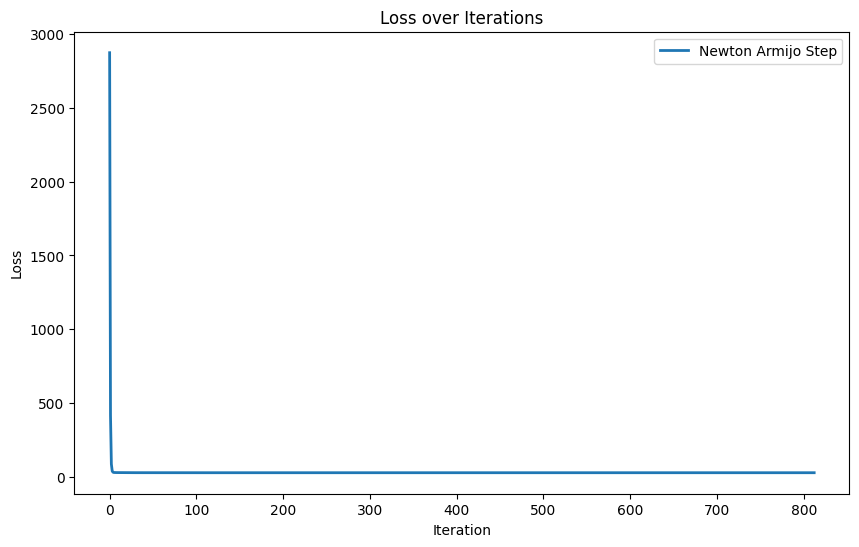

In [264]:
plt.figure(figsize=(10, 6))
plt.plot(lossy_3, label="Newton Armijo Step", linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss over Iterations")
plt.legend()
plt.show()


In [265]:
print("loss const step:",f(w_opt))
print("loss armijo step way:",f(w_opt_2))
print("Loss Newton", f(w_opt_3))

loss const step: 26.715735572433
loss armijo step way: 26.715735572432042
Loss Newton 26.71573557243258


-----

so it looks like all have sort of the same error.... which is good

Gradient decent with armajo is the one with the smallest error (by 0.0000001 so its not that much...)